# **Instalando bibliotecas**

In [24]:
pip install tensorflow matplotlib numpy sklearn seaborn pandas scikit-learn

In [25]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import layers, datasets

from sklearn.metrics import confusion_matrix

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
print("TF version:", tf.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

TF version: 2.12.0
GPU is NOT AVAILABLE


# **Importando dataset e filtrando o par de números escolhido**

In [27]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [28]:
#Recebendo o Par
label_a = input('Escolha o primeiro algarismo do par que será treinado (0 a 9): ')
label_b = input('Escolha o segundo algarismo do par que será treinado (0 a 9): ')

Escolha o primeiro algarismo do par que será treinado (0 a 9): 1
Escolha o segundo algarismo do par que será treinado (0 a 9): 3


In [29]:
# Filtrar apenas as imagens e rótulos com as duas labels escolhidas
train_filter = np.where((train_labels == int(label_a) ) | (train_labels == int(label_b)))
test_filter = np.where((test_labels == int(label_a)) | (test_labels == int(label_b)))

(train_images_filtered, train_labels_filtered) = train_images[train_filter], train_labels[train_filter]
(test_images_filtered, test_labels_filtered) = test_images[test_filter], test_labels[test_filter]

In [30]:
#Imprimindo a Forma dos Conjuntos treinados
print("Forma do conjunto de treinamento filtrado:", train_images_filtered.shape)
print("Forma do conjunto de rótulos de treinamento filtrado:", train_labels_filtered.shape)
print("Forma do conjunto de teste filtrado:", test_images_filtered.shape)
print("Forma do conjunto de rótulos de teste filtrado:", test_labels_filtered.shape)

Forma do conjunto de treinamento filtrado: (12873, 28, 28)
Forma do conjunto de rótulos de treinamento filtrado: (12873,)
Forma do conjunto de teste filtrado: (2145, 28, 28)
Forma do conjunto de rótulos de teste filtrado: (2145,)


# **Criando o modelo**

In [49]:
model = tf.keras.models.Sequential()

# Adding convolutional and pooling layers
model.add(layers.Conv2D(28, (1, 1), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

Adicionando as camadas densas:

In [50]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

Resumo do modelo criado:

In [51]:
model.summary()
model.losses

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 28)        56        
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 28)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 12, 12, 64)        16192     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 1024)             

[]

**Pesos Iniciais**

In [52]:
print(model.get_weights())

[array([[[[-0.44268763, -0.05196184,  0.31223255,  0.08626705,
           0.00045136, -0.298805  ,  0.41656768, -0.35355076,
           0.06691849,  0.00772467, -0.23277271, -0.00573868,
           0.17547137, -0.21409513, -0.29068255,  0.3353036 ,
          -0.27744228, -0.29259163, -0.20761912, -0.42503414,
          -0.05091381,  0.13264215, -0.43601644,  0.36925638,
           0.12846011,  0.0697546 , -0.11488584, -0.33466518]]]],
      dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), array([[[[ 6.24213368e-02,  2.05033273e-03,  4.55376208e-02, ...,
          -6.62869290e-02, -5.86764067e-02,  3.60476375e-02],
         [-3.44442055e-02,  5.06957620e-02, -9.81815159e-03, ...,
           4.71937358e-02,  3.61178964e-02,  3.83295864e-02],
         [ 1.37879550e-02,  4.58274186e-02, -5.24012111e-02, ...,
          -1.30523667e-02,  6.03335053e-02,  1.40590966e-03],
         ...

# **Compilando o modelo e Iniciando o treinamento**

In [53]:
# Utilizing the "adam" algorithm as optimizer and collecting loss and accuracy
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Receiving all the training info into history variable and training for 10 epochs
history = model.fit(train_images_filtered, train_labels_filtered, epochs=10,
                    validation_data=(test_images_filtered, test_labels_filtered))

Epoch 1/10
403/403 [==============================] - 15s 36ms/step - loss: 0.0713 - accuracy: 0.9815 - val_loss: 0.0038 - val_accuracy: 0.9991
Epoch 2/10
403/403 [==============================] - 14s 35ms/step - loss: 0.0104 - accuracy: 0.9957 - val_loss: 0.0014 - val_accuracy: 0.9995
Epoch 3/10
403/403 [==============================] - 14s 36ms/step - loss: 0.0069 - accuracy: 0.9977 - val_loss: 9.5972e-04 - val_accuracy: 0.9995
Epoch 4/10
403/403 [==============================] - 15s 37ms/step - loss: 0.0062 - accuracy: 0.9976 - val_loss: 0.0033 - val_accuracy: 0.9986
Epoch 5/10
403/403 [==============================] - 15s 38ms/step - loss: 0.0053 - accuracy: 0.9981 - val_loss: 0.0012 - val_accuracy: 0.9995
Epoch 6/10
403/403 [==============================] - 15s 37ms/step - loss: 0.0021 - accuracy: 0.9995 - val_loss: 0.0023 - val_accuracy: 0.9991
Epoch 7/10
403/403 [==============================] - 14s 36ms/step - loss: 0.0022 - accuracy: 0.9995 - val_loss: 3.6405e-04 - val_a

**Pesos Finais**

In [54]:
print(model.get_weights())

[array([[[[-0.44268763, -0.05196184,  0.42036062,  0.1504442 ,
          -0.0063375 , -0.298805  ,  0.5275771 , -0.35355076,
           0.13939309,  0.04398326, -0.23277271, -0.00573868,
           0.26257524, -0.21409513, -0.29068255,  0.44497874,
          -0.27744228, -0.29259163, -0.20761912, -0.42503414,
          -0.05091381,  0.24291429, -0.43601644,  0.4810216 ,
           0.16954286,  0.19296393, -0.11488584, -0.33466518]]]],
      dtype=float32), array([ 0.        ,  0.        , -0.00986475, -0.04347849, -0.00674858,
        0.        , -0.00924861,  0.        , -0.04248771, -0.02143098,
        0.        ,  0.        , -0.02876572,  0.        ,  0.        ,
       -0.01214645,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.01651528,  0.        , -0.01414201, -0.02031915,
       -0.06345872,  0.        ,  0.        ], dtype=float32), array([[[[ 6.24213368e-02,  2.05033273e-03,  4.55376208e-02, ...,
          -6.62869290e-02, -5.86764067e-02,  3.604

# **Criando os gráficos de Erro e Acurácia durante o Treinamento e Validação**

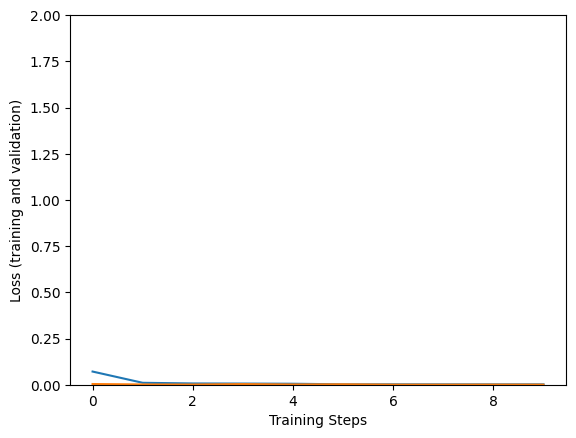

In [55]:
plt.figure()
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])


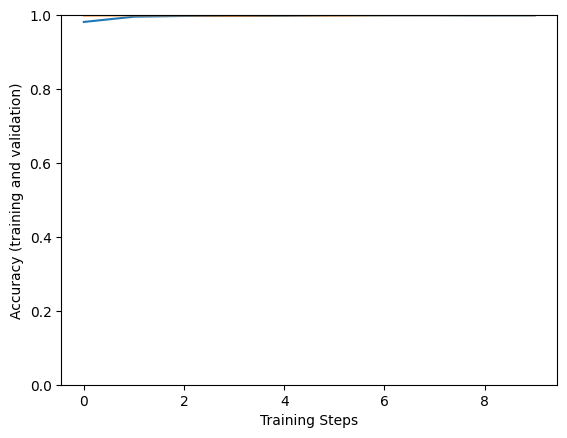

In [56]:
plt.figure()
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

Avaliando o Classificador:

In [57]:
test_loss, test_acc = model.evaluate(test_images_filtered,  test_labels_filtered, verbose=2)
print(test_acc)

68/68 - 1s - loss: 3.5747e-04 - accuracy: 1.0000 - 527ms/epoch - 8ms/step
1.0


# **Testando o classificador para um dos dados de Teste**

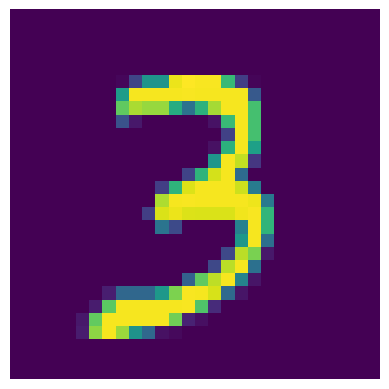

1/1 [==============================] - 0s 88ms/step
True label: 3
Predicted label: 3


In [58]:
classNames = [label_a, label_b]

x,y = (test_images_filtered[50], test_labels_filtered[50])
plt.imshow(x)
plt.axis('off')
plt.show()

# Expand the validation image to (1, 224, 224, 3) before predicting the label
prediction_scores = model.predict(np.expand_dims(x, axis=0))
predicted_index = np.argmax(prediction_scores)
print("True label: " + classNames[classNames.index(str(y))])
print("Predicted label: " + classNames[classNames.index(str(predicted_index))])

# **Matriz de Confusão**

In [59]:
# Fazendo predição com os dados de teste
y_prediction = model.predict(test_images_filtered)
y_prediction = np.argmax (y_prediction, axis = 1)
y_test=test_labels_filtered

# Criando a matriz de confusão
result = confusion_matrix(y_test, y_prediction , normalize='pred')

68/68 [==============================] - 1s 13ms/step


Imprimindo a matriz

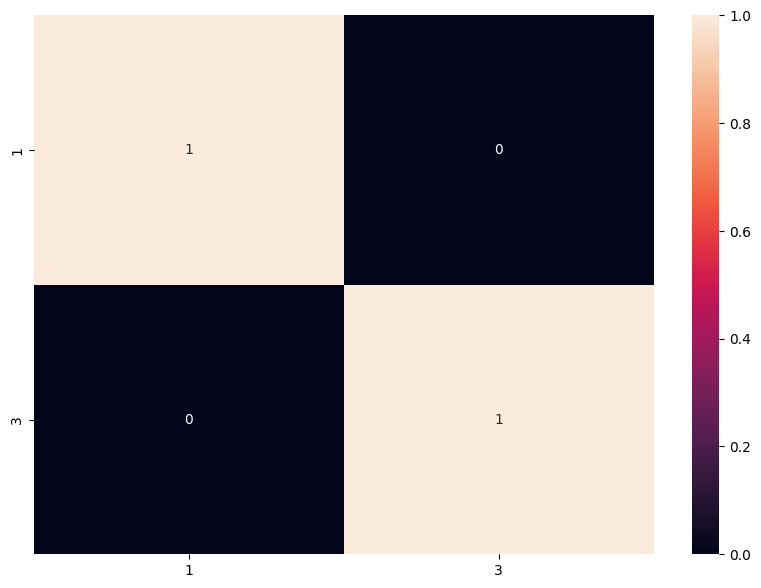

In [60]:
df_cm = pd.DataFrame(result, index = classNames, columns = classNames)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.show()